# Library demo and figures

In [62]:
import graph_structure as gs
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)

In [63]:
# Point clouds: A and B
n_points = 5
n_dim = 2 # Two dimensions so we can plot them without using dirty tricks

# This is the noise level
snr = 5 # dB
def alpha_from_snr(snr):
    return 10**(-snr / 20)
   
alpha = alpha_from_snr(snr)
A = np.random.random((n_points, n_dim))-0.5
B = A + alpha * (np.random.random((n_points, n_dim))-0.5)

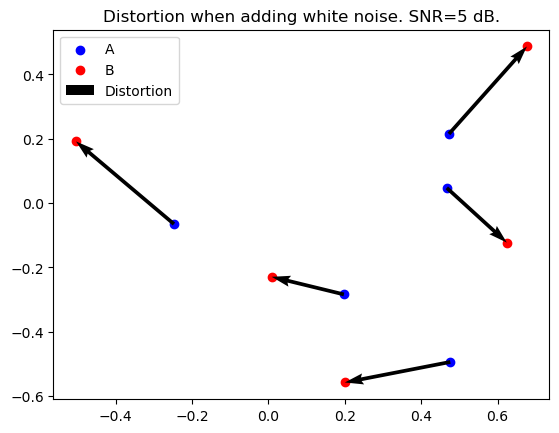

In [64]:
plt.figure()
plt.scatter(A[:,0], A[:,1], c='b', label='A')
plt.scatter(B[:,0], B[:,1], c='r', label='B')
plt.quiver(A[:,0], A[:,1], B[:,0]-A[:,0], B[:,1]-A[:,1], angles='xy', scale_units='xy', scale=1, label='Distortion')
plt.title(f'Distortion when adding white noise. SNR={snr} dB.')
plt.legend()
plt.show()

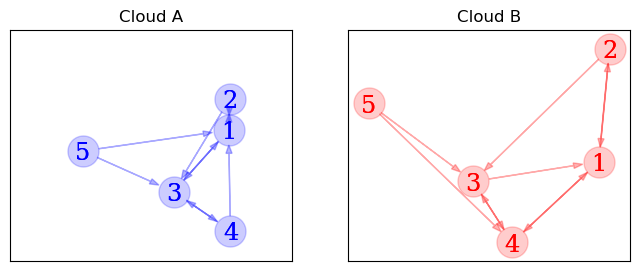

In [67]:
# Nearest neighbors
k = 2 # Number of neighbors
na = gs.nearest_neighbors(A, self_is_neighbor=False, metric='euclidean')[:,:k]
nb = gs.nearest_neighbors(B, self_is_neighbor=False, metric='euclidean')[:,:k]

minx = min(np.min(A[:,0]), np.min(B[:,0]))-0.1
maxx = max(np.max(A[:,0]), np.max(B[:,0]))+0.1
miny = min(np.min(A[:,1]), np.min(B[:,1]))-0.1           
maxy = max(np.max(A[:,1]), np.max(B[:,1]))+0.1

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.scatter(A[:,0], A[:,1], c='b', label='A', alpha=0.2, s=500)
plt.xlim([minx, maxx])
plt.ylim([miny, maxy])
plt.xticks([])
plt.yticks([])
plt.title('Cloud A')
plt.subplot(1,2,2)
plt.scatter(B[:,0], B[:,1], c='r', label='B', alpha=0.2, s=500)
plt.xlim([minx, maxx])
plt.ylim([miny, maxy])
plt.xticks([])
plt.yticks([])
plt.title('Cloud B')
for n in range(n_points):
    for k_ in range(k):
        plt.subplot(1,2,1)
        x0 = A[n,:]
        x1 = A[na[n,k_],:]
        dx = x1-x0
        direcao_x = dx / np.linalg.norm(dx)
        c = 0.08        
        x_inicial = x0 + c * direcao_x
        x_final = x1 - c * direcao_x
        dx_final = x_final-x_inicial
        plt.arrow(x=x_inicial[0], y=x_inicial[1],dx=dx_final[0], dy=dx_final[1],
                  length_includes_head = True,
                  head_width=0.03,
                  color='b',
                  alpha=0.3,
                  )
        plt.text(x=A[n,0], y=A[n,1], s=f'{n+1}',
                 horizontalalignment='center',
                 verticalalignment='center_baseline',
                 fontsize='xx-large',
                 color='b',
                 fontname='serif'
                 )
        plt.subplot(1,2,2)
        x0 = B[n,:]
        x1 = B[nb[n,k_],:]
        dx = x1-x0
        direcao_x = dx / np.linalg.norm(dx)
        c = 0.08        
        x_inicial = x0 + c * direcao_x
        x_final = x1 - c * direcao_x
        dx_final = x_final-x_inicial        
        
        plt.arrow(x=x_inicial[0], y=x_inicial[1],dx=dx_final[0], dy=dx_final[1],
            length_includes_head = True,
            head_width=0.03,
            color='r',
            alpha=0.3,
            )
        plt.text(x=B[n,0], y=B[n,1], s=f'{n+1}',
                 horizontalalignment='center',
                 verticalalignment='center_baseline',
                 fontsize='xx-large',
                 color='r',
                 fontname='serif'
                 )
plt.savefig('graph_induction.pdf',  bbox_inches='tight')

In [66]:
# Jaccard similarity for each point in the cloud
all_js = [gs.compute_jaccard_similarity(set(na[i,:]), set(nb[i,:])) for i in range(na.shape[0])]
for i, js in enumerate(all_js):
    print(f'i={i}, js={js}')
print(f'Average: {np.mean(all_js)}')

i=0, js=0.3333333333333333
i=1, js=1.0
i=2, js=1.0
i=3, js=1.0
i=4, js=0.3333333333333333
Average: 0.7333333333333333


In [22]:
# Average similarity for all points in the cloud
s = gs.mean_neighborhood_similarity_from_neighborhood(na, nb, k=k)
print(s)

1.0


In [23]:
# Or: a function that does everything
s = gs.mean_neighborhood_similarity_from_points(A, B, k=k)
print(s)

1.0
